In [1]:
#pip install pandas

import pandas as pd

#All 6 csv aviable from AirBNB web
csv_files = [
    "DATA/reservations.csv",
    "DATA/reservations (1).csv",
    "DATA/reservations (2).csv",
    "DATA/reservations (3).csv",
    "DATA/reservations (4).csv",
    "DATA/reservations (5).csv",
]

# Read and concatenate all CSVs
dataframes = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)
# Drop duplicates based on 'Codigo de confirmacion' unique for each reservation.
# This is done because, I'm downloading manually each csv, so I could be downloading more than once the same csv.
cleaned_df = combined_df.drop_duplicates(subset=['Código de confirmación'])

print(cleaned_df.head(15))

   Código de confirmación                              Estado  \
0              HMM39A32MY  En espera de la reseña del huésped   
1              HMHD29BF4W  En espera de la reseña del huésped   
2              HMNFC2M2HE  En espera de la reseña del huésped   
3              HMDX3FPRSE                    Huésped anterior   
4              HMJWPAAE4S  En espera de la reseña del huésped   
5              HMH5FWWQAH                    Huésped anterior   
6              HM4PQND42C  En espera de la reseña del huésped   
7              HM2JRAWRS3                    Huésped anterior   
8              HMQ5WCR5YP                    Huésped anterior   
9              HMYY8JZNT9                    Huésped anterior   
10             HMDWKMCDJY                    Huésped anterior   
11             HMYH9HDA9M                    Huésped anterior   
12             HMPE4NCEYR                    Huésped anterior   
13             HM5XJDCD45                    Huésped anterior   
14             HMK2SQZMYA

In [2]:
# Listing new column names, easier to understand
new_column_names = [
    "Código de confirmación",
    "Estado",
    "Nombre del huésped",
    "Contacto",
    "Número de adultos",
    "Número de niños",
    "Número de bebés",
    "Ingreso",
    "Salida",
    "Número de noches",
    "Fecha de Reservación",
    "Propiedad",
    "Ingresos Totales"
]

# Changing Column Names
cleaned_df.columns = new_column_names

# Understanding more about the Data
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Código de confirmación  207 non-null    object
 1   Estado                  207 non-null    object
 2   Nombre del huésped      207 non-null    object
 3   Contacto                7 non-null      object
 4   Número de adultos       207 non-null    int64 
 5   Número de niños         207 non-null    int64 
 6   Número de bebés         207 non-null    int64 
 7   Ingreso                 207 non-null    object
 8   Salida                  207 non-null    object
 9   Número de noches        207 non-null    int64 
 10  Fecha de Reservación    207 non-null    object
 11  Propiedad               207 non-null    object
 12  Ingresos Totales        207 non-null    object
dtypes: int64(4), object(9)
memory usage: 21.2+ KB
None


In [3]:
# Convirtiendo la columna Ingreso de object a date
# Create a copy of cleaned_df to avoid modifying the original dataframe
cleaned_DateTime_df = cleaned_df.copy()

# Convertir la columna 'Ingreso' a formato datetime
cleaned_DateTime_df['Ingreso'] = pd.to_datetime(cleaned_DateTime_df['Ingreso'], format='%d/%m/%Y', errors='coerce')

# Verificar si hay valores nulos después de la conversión
if cleaned_DateTime_df['Ingreso'].isna().any():
    print("Existen valores no convertidos a datetime. Revisa los siguientes datos:")
    print(cleaned_DateTime_df[cleaned_DateTime_df['Ingreso'].isna()])

# Mostrar el tipo de la columna después de la conversión
print(cleaned_DateTime_df['Ingreso'].dtype)


datetime64[ns]


In [4]:
# Convirtiendo la columna Salida de object a date

# Convertir la columna 'Salida' a formato datetime
cleaned_DateTime_df['Salida'] = pd.to_datetime(cleaned_DateTime_df['Salida'], format='%d/%m/%Y', errors='coerce')

# Verificar si hay valores nulos después de la conversión
if cleaned_DateTime_df['Salida'].isna().any():
    print("Existen valores no convertidos a datetime. Revisa los siguientes datos:")
    print(cleaned_DateTime_df[cleaned_DateTime_df['Salida'].isna()])

# Mostrar el tipo de la columna después de la conversión
print(cleaned_DateTime_df['Salida'].dtype)


datetime64[ns]


In [14]:
# Convirtiendo la columna Fecha de Reservación de object a date

# Convert 'Fecha de Reservación' to datetime format (YYYY-MM-DD)
cleaned_DateTime_df['Fecha de Reservación'] = pd.to_datetime(
    cleaned_DateTime_df['Fecha de Reservación'], 
    format='%Y-%m-%d', 
    errors='coerce'
)

# Verify if there are NaT values after conversion
if cleaned_DateTime_df['Fecha de Reservación'].isna().any():
    print("Existen valores no convertidos a datetime. Revisa los siguientes datos:")
    print(cleaned_DateTime_df[cleaned_DateTime_df['Fecha de Reservación'].isna()])

# Display the column type after conversion
print(cleaned_DateTime_df['Fecha de Reservación'].dtype)

#Revisando todos los cambios de Date que realizamos
print(cleaned_DateTime_df.head())


datetime64[ns]
  Código de confirmación                              Estado  \
0             HMM39A32MY  En espera de la reseña del huésped   
1             HMHD29BF4W  En espera de la reseña del huésped   
2             HMNFC2M2HE  En espera de la reseña del huésped   
3             HMDX3FPRSE                    Huésped anterior   
4             HMJWPAAE4S  En espera de la reseña del huésped   

   Nombre del huésped           Contacto  Número de adultos  Número de niños  \
0   Leonardo Calasans  +55 21 99259-6924                  1                0   
1  Brenda Lucas Braga  +55 75 98891-6342                  2                0   
2        Martin Ortiz      +591 69609063                  2                0   
3       Vianka Mamani    +56 9 7476 3088                  1                0   
4        Diego Florez    +51 912 708 082                  1                0   

   Número de bebés    Ingreso     Salida  Número de noches  \
0                0 2025-01-16 2025-01-20                 

In [15]:
# Convirtiendo la columna Ingresos Totales de object a date

# Eliminar el signo '$' y convertir a float
cleaned_DateTime_df['Ingresos Totales'] = (
    cleaned_DateTime_df['Ingresos Totales']
    .str.replace('$', '', regex=False)  # Eliminar el signo $
    .str.replace(',', '')  # Eliminar comas, si existen
    .astype(float)  # Convertir a float
)

# Verificar si hay valores NaN tras la conversión
if cleaned_DateTime_df['Ingresos Totales'].isna().any():
    print("Existen valores no válidos después de la conversión. Revisa los siguientes datos:")
    print(cleaned_DateTime_df[cleaned_DateTime_df['Ingresos Totales'].isna()])

# Mostrar el tipo de la columna después de la conversión
print("Tipo de la columna 'Ingresos Totales':", cleaned_DateTime_df['Ingresos Totales'].dtype)


Tipo de la columna 'Ingresos Totales': float64


In [7]:
# We are going to divide the DataFrame into 2 separated ones.
# One will be used for day to day transactions, such as occupancy rate. Used for: Occupancy rates, Booking lead time, Lenght Stay trends, Loyalty trends
# The other will be used for aggregated functions for property comparisons, between months. Used for: Earnings analysis, Demographic Analysis, Seasonal Analysis
# I have concluded to use a Power BI data table to aggregate date time variables

# Changing Property Name for simplicity and adding Property Type for further Analysis.
# First obtaining the unique values of Propiedad, the value is the title inputted for the AirBNB ad.
# Get unique values from the 'Propiedad' column
unique_properties = cleaned_df['Propiedad'].unique()

# Display the unique values
print("Unique values in 'Propiedad':")
print(unique_properties)

# Now that we have the values, we are going to change the property values for a more simple understanding

#No me cuadran los datos del Anuncio 'Nuevo y estratégico departamento en Equipetrol', no lo tengo en el listado de AirBNB
# Filtrar los datos para la propiedad 'Nuevo y estratégico departamento en Equipetrol'
filtered_df_dptoEquipetrol = cleaned_df[cleaned_df['Propiedad'] == 'Nuevo y estratégico departamento en Equipetrol']
print(filtered_df_dptoEquipetrol.head().sort_values('Ingreso', ascending=False))
# Llegue a la conclusion de que es el Macororo 8, un inmueble que fue ya fue vendido hace 2 años

Unique values in 'Propiedad':
['Exclusivo y Elegante dpto!'
 'En Equipetrol: Confort & Estilo, Ubicación Ideal'
 'SMART YOU: Confort y Estilo' 'Dpto. 3 Dorm. con Piscina y Gym'
 'Monoambiente exclusivo SKY Elite'
 'Sky Elite, departamento con parqueo, gym y más'
 'Sky Elite: tu destino en Equipetrol' 'Vive la experiencia de Sky Elite'
 'Confort y Estilo en Santa Cruz' 'SKY Elite: ¡Hospédate Aquí!'
 'Confort y Negocios en Santa Cruz' 'Senior Suite: Ejecutivos/Parejas'
 'Nuevo y estratégico departamento en Equipetrol']
    Código de confirmación            Estado             Nombre del huésped  \
193             HM8EJYDC3M  Huésped anterior                    John Barron   
194             HM3NH3XTEJ  Huésped anterior                  Airton Suarez   
191             HMQENSESJA  Huésped anterior  Angeles Karen Claure Zambrana   
192             HMNJJ5P2CH  Huésped anterior                      Hugo Aedo   
195             HM2F8P2MKR  Huésped anterior                 Lesly Gonzales   

  

In [17]:
# Replacing the values from the 'Propiedad' column, to simplify the analysis and understand what the value stands for

# Define the mapping dictionary
property_mapping = {
    'En Equipetrol: Confort & Estilo, Ubicación Ideal': 'MACORORO 12 - 12F',
    'SMART YOU: Confort y Estilo': 'YOU - 316',
    'Monoambiente exclusivo SKY Elite': 'SKY ELITE - 320',
    'Sky Elite, departamento con parqueo, gym y más': 'SKY ELITE - 132',
    'Sky Elite: tu destino en Equipetrol': 'SKY ELITE - 229',
    'Confort y Estilo en Santa Cruz': 'SKY ELITE - 115',
    'Confort y Negocios en Santa Cruz': 'TORRES SIRARI - 5A',
    'Nuevo y estratégico departamento en Equipetrol': 'MACORORO 8',
    'Dpto. 3 Dorm. con Piscina y Gym': 'MACORORO 15 - 8G',
    'Vive la experiencia de Sky Elite': 'SKY ELITE - 524',
    'SKY Elite: ¡Hospédate Aquí!': 'SKY ELITE - 323',
    'Senior Suite: Ejecutivos/Parejas': 'HOTEL RADISSON - SENIOR SUITE',
    'Exclusivo y Elegante dpto!': 'SKY ELITE - 510'
}

# Replace the values in the 'Propiedad' column
cleaned_DateTime_df['Propiedad'] = cleaned_DateTime_df['Propiedad'].replace(property_mapping)

# Display the updated DataFrame
print(cleaned_DateTime_df.head())

# Reasuring the values have change correctly
unique_properties = cleaned_DateTime_df['Propiedad'].unique()
print(unique_properties)

  Código de confirmación                              Estado  \
0             HMM39A32MY  En espera de la reseña del huésped   
1             HMHD29BF4W  En espera de la reseña del huésped   
2             HMNFC2M2HE  En espera de la reseña del huésped   
3             HMDX3FPRSE                    Huésped anterior   
4             HMJWPAAE4S  En espera de la reseña del huésped   

   Nombre del huésped           Contacto  Número de adultos  Número de niños  \
0   Leonardo Calasans  +55 21 99259-6924                  1                0   
1  Brenda Lucas Braga  +55 75 98891-6342                  2                0   
2        Martin Ortiz      +591 69609063                  2                0   
3       Vianka Mamani    +56 9 7476 3088                  1                0   
4        Diego Florez    +51 912 708 082                  1                0   

   Número de bebés    Ingreso     Salida  Número de noches  \
0                0 2025-01-16 2025-01-20                 4   
1         

In [18]:
# Adding Property Type to further our analysis, to underestand what type of properties perform better, mapping the values from 'Propiedad' 

# Define the mapping dictionary
property_type_mapping = {
    'MACORORO 12 - 12F': '1 Dormitorio',
    'YOU - 316': 'Monoambiente',
    'SKY ELITE - 320': 'Monoambiente',
    'SKY ELITE - 132': '1 Dormitorio',
    'SKY ELITE - 229': 'Monoambiente',
    'SKY ELITE - 115': 'Monoambiente',
    'TORRES SIRARI - 5A': '1 Dormitorio',
    'MACORORO 8': '1 Dormitorio',
    'MACORORO 15 - 8G': '3 Dormitorios',
    'SKY ELITE - 524': 'Monoambiente',
    'SKY ELITE - 323': 'Monoambiente',
    'HOTEL RADISSON - SENIOR SUITE': 'Senior Suite',
    'SKY ELITE - 510': 'Monoambiente'
}

# Create the new column 'Property Type' using the mapping dictionary
cleaned_DateTime_df['Property Type'] = cleaned_DateTime_df['Propiedad'].map(property_type_mapping)

# Display the updated DataFrame
print(cleaned_DateTime_df[['Propiedad', 'Property Type']].head())


           Propiedad  Property Type
0    SKY ELITE - 510   Monoambiente
1  MACORORO 12 - 12F   1 Dormitorio
2          YOU - 316   Monoambiente
3   MACORORO 15 - 8G  3 Dormitorios
4    SKY ELITE - 510   Monoambiente


In [10]:
# Finding out if there are any missing values. Should have done it before, but I esxpect no missing value from an AirBNB platform

print(cleaned_df.isna().sum())

# We have 200 missing values in Contecto, none of them repeats themselves.
print(cleaned_df['Contacto'].value_counts())

# The DataFrame lenght is 207
print(len(cleaned_df))

Código de confirmación      0
Estado                      0
Nombre del huésped          0
Contacto                  200
Número de adultos           0
Número de niños             0
Número de bebés             0
Ingreso                     0
Salida                      0
Número de noches            0
Fecha de Reservación        0
Propiedad                   0
Ingresos Totales            0
Property Type               0
dtype: int64
Contacto
+55 21 99259-6924    1
+55 75 98891-6342    1
+591 69609063        1
+56 9 7476 3088      1
+51 912 708 082      1
+1 604-679-1612      1
+1 602-386-6258      1
Name: count, dtype: int64
207


In [ ]:
# Revision final a DataFrame que exportaremos para usar en el Power BI
print(cleaned_DateTime_df.describe())
print(cleaned_DateTime_df.info())
print(cleaned_DateTime_df.head())

# Entendiendo el DataSet, veo que el min de Ingresos Totales es casi 3$, lo que es un outlier, debe ser alguna compensacion por
# cancelacion de la reserva. Quiero revisar cuales son los posibles outliers, en todo caso seria datos por debajo del threshold
# los que busco, porque los datos de por encima del threshold si nos beneficia, el problema son los de abajo por algun tipo de
# cancelacion de la reserva.

Total_75th_IngresosTotales = cleaned_DateTime_df['Ingresos Totales'].quantile(0.75)
Total_25th_IngresosTotales = cleaned_DateTime_df['Ingresos Totales'].quantile(0.25)
IQR_IngresosTotales = Total_75th_IngresosTotales - Total_25th_IngresosTotales
lower_IngresosTotales = Total_25th_IngresosTotales - (1.5 * IQR_IngresosTotales)

# Subsetting to see the and understand the outliers
print(lower_IngresosTotales)
# Veo que mi Threshold es un numero negativo, por ende no tengo outliers matematicamente hablando
print(cleaned_DateTime_df[cleaned_DateTime_df['Ingresos Totales'] < lower_IngresosTotales])

       Número de adultos  Número de niños  Número de bebés  \
count         207.000000       207.000000       207.000000   
mean            1.743961         0.048309         0.014493   
min             1.000000         0.000000         0.000000   
25%             1.000000         0.000000         0.000000   
50%             2.000000         0.000000         0.000000   
75%             2.000000         0.000000         0.000000   
max             6.000000         2.000000         1.000000   
std             0.742045         0.236447         0.119800   

                             Ingreso               Salida  Número de noches  \
count                            207                  207        207.000000   
mean   2024-05-13 22:57:23.478260992  2024-05-18 00:00:00          4.043478   
min              2022-02-25 00:00:00  2022-03-05 00:00:00          1.000000   
25%              2024-03-13 12:00:00  2024-03-15 12:00:00          1.000000   
50%              2024-06-30 00:00:00  2024-07-

In [32]:
# Buscare cuales son los outliers por Propiedad
min_Ingresos_per_property = cleaned_DateTime_df.groupby('Propiedad')['Ingresos Totales'].min()
print(min_Ingresos_per_property.sort_values())

# Veo que el SKY ELITE - 510 es el unico que tiene un minimo que no cuadra
print(cleaned_DateTime_df[cleaned_DateTime_df['Ingresos Totales'] == 3.93])
print(cleaned_DateTime_df[cleaned_DateTime_df['Ingresos Totales'] < 10])

# Removing the outlier but as another DataFrame, I'll set arbitrary a threshold of 10 as an outlier, to the min values of other
# propierties are around 13$ as min
# Filter rows where 'Ingresos Totales' is greater than 10 and create a new DataFrame
cleaned_Outliers_df = cleaned_DateTime_df[cleaned_DateTime_df["Ingresos Totales"] > 10].copy()

print(cleaned_Outliers_df.describe())

Propiedad
SKY ELITE - 510                    3.93
SKY ELITE - 320                   13.62
SKY ELITE - 524                   13.62
SKY ELITE - 115                   14.17
YOU - 316                         14.17
SKY ELITE - 323                   14.17
TORRES SIRARI - 5A                14.76
SKY ELITE - 132                   16.60
SKY ELITE - 229                   23.57
MACORORO 12 - 12F                 33.27
MACORORO 8                        35.68
HOTEL RADISSON - SENIOR SUITE     75.66
MACORORO 15 - 8G                 158.11
Name: Ingresos Totales, dtype: float64
   Código de confirmación            Estado Nombre del huésped Contacto  \
27             HM9TD4MP2J  Huésped anterior          Yaya Wang      NaN   
28             HMC8TKPABK  Huésped anterior      Alba Castillo      NaN   

    Número de adultos  Número de niños  Número de bebés    Ingreso     Salida  \
27                  1                0                0 2024-12-01 2024-12-02   
28                  2                0     

In [12]:
# We have a 1 year contract offer to rent Sky Elite 229 property, for 500$ a month.
# We want to see if the performance in AirBNB is better than those 500$

# Asegurarse de que la columna 'Ingreso' esté en formato de fecha
cleaned_df['Ingreso'] = pd.to_datetime(cleaned_df['Ingreso'])

# Filtrar los datos para la propiedad 'Sky Elite: tu destino en Equipetrol'
filtered_df_SkyElite = cleaned_df[cleaned_df['Propiedad'] == 'Sky Elite: tu destino en Equipetrol']

# Crear columnas para mes y año basadas en 'Ingreso'
filtered_df_SkyElite['Mes'] = filtered_df_SkyElite['Ingreso'].dt.month
filtered_df_SkyElite['Año'] = filtered_df_SkyElite['Ingreso'].dt.year

# Agrupar por año y mes, sumando los ingresos
grouped_df_SkyElite = filtered_df_SkyElite.groupby(['Año', 'Mes'])['Ingresos Totales'].sum().reset_index()

# Ordenar los datos para mejor visualización
grouped_df_SkyElite = grouped_df_SkyElite.sort_values(by=['Año', 'Mes'])

# Mostrar el resultado
print(grouped_df_SkyElite)


Empty DataFrame
Columns: [Año, Mes, Ingresos Totales]
Index: []


C:\Users\jcarl\AppData\Local\Temp\ipykernel_19484\4016693723.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_df['Ingreso'] = pd.to_datetime(cleaned_df['Ingreso'])


Empty DataFrame
Columns: [Año, Mes, Año-Mes]
Index: []
nan
Empty DataFrame
Columns: [Año, Mes, Ingresos Totales, Año-Mes]
Index: []


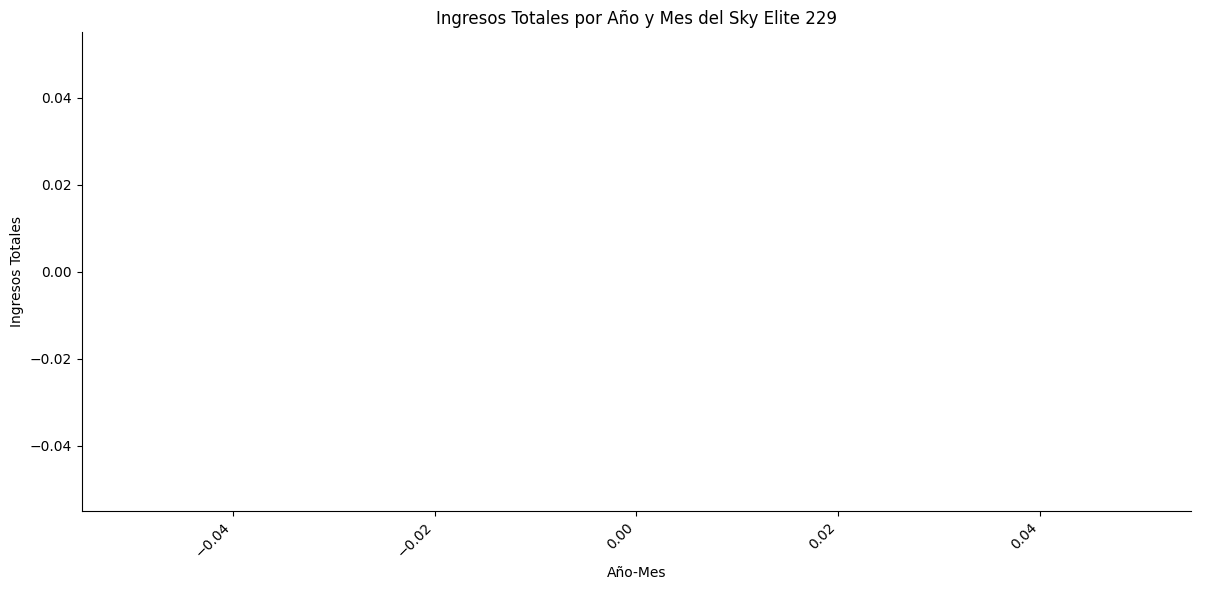

In [13]:
# Graficando los Ingresos Totales por Año del Sky Elite 229
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna 'Año-Mes' combinando las columnas 'Año' y 'Mes'
grouped_df_SkyElite['Año-Mes'] = grouped_df_SkyElite['Año'].astype(str) + '-' + grouped_df_SkyElite['Mes'].astype(str).str.zfill(2)

# Verificar los datos
print(grouped_df_SkyElite[['Año', 'Mes', 'Año-Mes']].head())
print(grouped_df_SkyElite['Ingresos Totales'].mean())
print(grouped_df_SkyElite)

# Crear el barplot usando 'Año-Mes' como eje X y 'Ingresos Totales' como Y
sns.catplot(
    data=grouped_df_SkyElite,
    x='Año-Mes',
    y='Ingresos Totales',
    kind='bar',
    height=6,
    aspect=2
)

# Ajustar etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha='right')
plt.title("Ingresos Totales por Año y Mes del Sky Elite 229")
plt.xlabel("Año-Mes")
plt.ylabel("Ingresos Totales")
plt.tight_layout()

# Mostrar el gráfico
plt.show()
